# --------------------- Imperial Valley Birds data - Guy McCaskie ----------------------

This is the Data from surveys performed by Guy MaCaskie in Imperial Valley

In [15]:
# jupyter nbextension enable jupyter_tabnine --py
# importing all the dependencies 
import pandas as pd
import numpy as np

# import data visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# docx file reading tools
import docx2txt
import textract
import sys

# import webscrapping tools
from urllib.request import urlretrieve
from bs4 import BeautifulSoup as bs

# import regular expression tools
import re
import string

# import date and time processing libraries
import datefinder
import datetime

### Reading the doc files from given directory

All the files are in .doc format which is an old file format 1997 - 2003 adapted by MS office suite. To read these files in python, we have to change the format to .docx file which is universally adapted and interpretable by most engines.

To do that we have to install antiword which works in linux only (It doesn't work for Windows but might work for Mac) We can then use it to convert all the .doc files to .docx format. This is the simplest way to read .doc files.  

In [206]:
!antiword "SESS - 4 JUL 2018.doc" > "SESS - 4 JUL 2018.docx"

In [16]:
from docx import Document
filename = "SESS - 4 JUL 2018.docx"
with open(filename , 'rb') as f:
    file = f.read()


In [17]:
def data_clean(text):
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('\\\\[\w\d]{3}', "", text)
 
    return text

In [18]:
file = str(file)
file = data_clean(file)


In [19]:
reg = re.compile('[Ss]pecies seen')
spn = reg.search(file)
birds_clean = file[spn.span()[1]+14:]
print(birds_clean)


 Cinnamon Teal (50), Northern Shoveler (3  three apparently healthy females feeding on the shore of the Salton Sea near the west end of Sinclair Road were believed to be early fall migrants - the earliest reported dates for fall migrants at the southern end of the Salton Sea are 30 June 2017 and 16 July 1977), Gadwall (3  three together at Rock Hill), American Wigeon (1  one adult male at Unit 1 was likely summering locally), Mallard (100), Northern Pintail (2  two cripples at Unit 1 of the Salton Sea National Wildlife Refuge), Green-winged Teal (3  three at Unit 1 of the Salton Sea National Wildlife Refuge), Canvasback (1  one female at Unit 1 of the Salton Sea National Wildlife Refuge was no doubt to be the same bird found here on 23 May), Redhead (1  one at Unit 1 of the Salton Sea National Wildlife Refuge), Bufflehead (1 - one somewhat worn female at Unit 1 was no doubt the same bird found here on 20 June), Ruddy Duck (100), Gambels Quail (30), Pied-billed Grebe (15), Eared Grebe (

In [20]:
d = dict(re.findall(r'([a-zA-Z-]+\s[a-zA-Z-]+\s[a-zA-Z-]+|[a-zA-Z-]+\s[a-zA-Z-]+|[a-zA-Z-]+)\s*\(.*?(\d+)', birds_clean))

print(d)

{'Cinnamon Teal': '50', 'Northern Shoveler': '3', 'Gadwall': '3', 'American Wigeon': '1', 'Mallard': '100', 'Northern Pintail': '2', 'Green-winged Teal': '3', 'Canvasback': '1', 'Redhead': '1', 'Bufflehead': '1', 'Ruddy Duck': '100', 'Gambels Quail': '30', 'Pied-billed Grebe': '15', 'Eared Grebe': '1', 'Western Grebe': '150', 'Clarks Grebe': '20', 'Rock Pigeon': '75', 'Eurasian Collared-Dove': '250', 'Inca Dove': '15', 'Common Ground-Dove': '35', 'White-winged Dove': '75', 'Mourning Dove': '100', 'Yellow-billed Cuckoo': '1', 'Greater Roadrunner': '6', 'Lesser Nighthawk': '6', 'Black-chinned Hummingbird': '6', 'Annas Hummingbird': '10', 'Costas Hummingbird': '2', 'Ridgways Rail': '2', 'Common Gallinule': '6', 'American Coot': '300', 'Black-necked Stilt': '1500', 'American Avocet': '300', 'Black-bellied Plover': '10', 'Snowy Plover': '50', 'Killdeer': '35', 'Whimbrel': '30', 'Long-billed Curlew': '250', 'Marbled Godwit': '50', 'Least Sandpiper': '15', 'Western Sandpiper': '3500', 'Short-

In [42]:
matches = datefinder.find_dates(filename)
for match in matches:
    print(match.date())
date = match.date()
date

2018-07-04


datetime.date(2018, 7, 4)

In [40]:
df = pd.DataFrame(d, index =[date])
df

,Cinnamon Teal,Northern Shoveler,Gadwall,American Wigeon,Mallard,Northern Pintail,Green-winged Teal,Canvasback,Redhead,Bufflehead,...,Western Meadowlark,Hooded Oriole,Bullocks Oriole,Red-winged Blackbird,Bronzed Cowbird,Brown-headed Cowbird,Brewers Blackbird,Great-tailed Grackle,Common Yellowthroat,and Blue Grosbeak
2018-07-04,50,3,3,1,100,2,3,1,1,1,...,25,1,2,350,5,20,15,150,20,2


In [41]:
d = pd.DataFrame(df.iloc[0]. reset_index())
d.rename(columns = {'index':'species', 0: 'quantity'}, inplace = True)
d

,species,2018-07-04
0,Cinnamon Teal,50
1,Northern Shoveler,3
2,Gadwall,3
3,American Wigeon,1
4,Mallard,100
...,...,...
104,Brown-headed Cowbird,20
105,Brewers Blackbird,15
106,Great-tailed Grackle,150
107,Common Yellowthroat,20


In [81]:
d.quantity = pd.to_numeric(d.quantity)


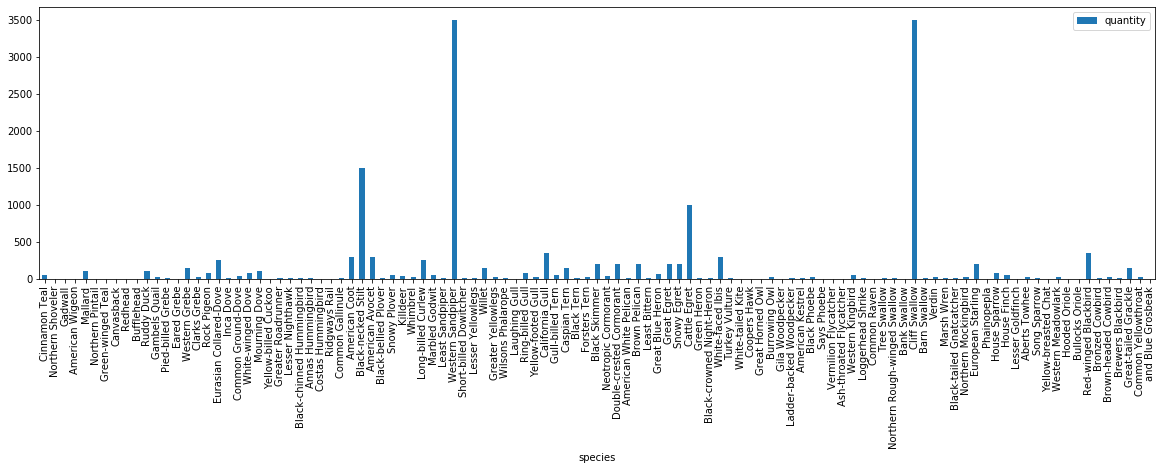

In [82]:
d.plot.bar(x = 'species', y = 'quantity', figsize = (20,5))

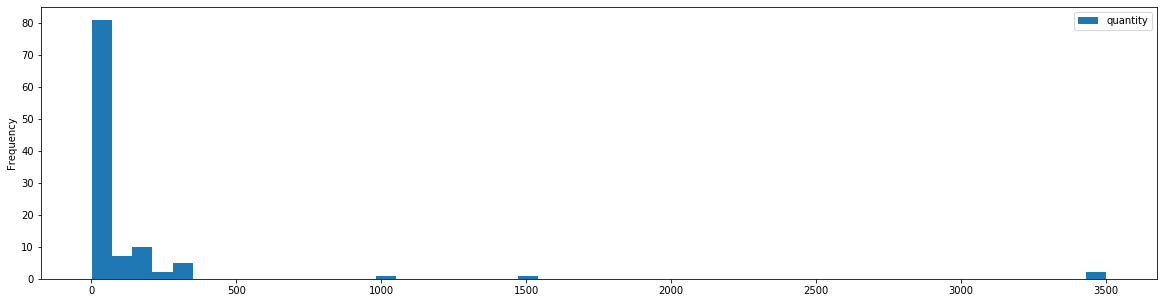

In [93]:
d.plot.hist(bins = 50, figsize = (20,5))

In [85]:
d.describe()

,quantity
count,109.000000
mean,138.825688
std,497.267587
min,1.000000
25%,4.000000
50%,15.000000
75%,75.000000
max,3500.000000


In [87]:
d.to_excel(r'SESS - 4 JUL 2018.xlsx', index = False)